https://www.kaggle.com/benoit72/uk-accidents-10-years-history-with-many-variables

Data is a conglomerate of data for a 10 year stretch of UK car accidents

In [1]:
#import TensorFlow and Keras API
import tensorflow as tf
from tensorflow import keras

#other imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2

In [2]:
#define functions

#Create even amounts of each category to reduce bias
def BalanceInputData(df, x_cols, y_col):
    #where x_col is list of strings and y_col is catagorical integer
    data = []
    #shuffle df before taking samples
    df = df.sample(frac=1).reset_index(drop=True)
    #Find limiting catagory
    max_sample = df[y_col].value_counts().min()
    limit_val = df[y_col].value_counts().index[-1]
    cat_count = len(df[y_col].value_counts())
    non_limits = df[y_col].value_counts().index[0:cat_count-1]
    #store x and y as arrays
    X = np.array(df[x_cols])
    Y = np.array(df[y_col])
    #create empty arrays to return balanced shuffled data
    x = []
    y = []
    #loop through y values and get up to max_sample (X, Y) pairs
    #from each catagory in non_limits
    for val in non_limits:
        sample_count = 0
        for i in range(len(Y)):
            if Y[i] == val and sample_count < max_sample:
                data.append([X[i], Y[i]])
                sample_count = sample_count+1
    #Get all limit values as (X, Y) pairs
    for i in range(len(Y)):
        if Y[i] == limit_val:
            data.append([X[i], Y[i]])
    #Shuffle data before returning
    np.random.shuffle(data)
    #populate x,y with balanced shuffled data
    for i in range(len(data)):
        x.append(data[i][0])
        y.append(data[i][1])    
    #return x and y
    x = np.array(x)
    y = np.array(y)
    return(x,y)

def PlotTrainingData(path, file_name):
    path, file_name = path, file_name
    path = os.path.join(path,file_name)
    epoch_data = pd.read_csv(path)
    epoch_data.drop(columns=['epoch'],inplace=True)
    display(epoch_data)
    plt.figure(figsize=(10,7))
    plt.tight_layout()
    #Plot accuracy and val_accuracy
    plt.subplot(2,2,1)
    acc_data = epoch_data[['accuracy','val_accuracy']]
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Model Accuracy')
    plt.plot(acc_data)
    plt.legend(['train','test'])
    #Plot loss and val_loss
    plt.subplot(2,2,2)
    loss_data = epoch_data[['loss','val_loss']]
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Model Loss')
    plt.plot(loss_data)
    plt.legend(['train','test'])
    #Print max val_acc and min val_loss
    max_acc = epoch_data['val_accuracy'].max()
    min_loss = epoch_data['val_loss'].min()
    print('Max validation accuracy: {}\nMin validation loss: {}'.format(max_acc,min_loss))

In [3]:
#Import data
raw_data = pd.read_csv('Accidents0514.csv')
display(raw_data.head())
print(raw_data.columns)

C:\Users\James Sloan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')


In [4]:
#Reduce data to a few fields. Goal is to predict Accident_Severity
data = raw_data[['Accident_Severity','Day_of_Week', 'Road_Type', 'Speed_limit', 'Junction_Control', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions']]

In [5]:
#Look at reduced data set
data.describe()

,Accident_Severity,Day_of_Week,Road_Type,Speed_limit,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
count,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06
mean,2.838592e+00,4.117038e+00,5.166836e+00,3.910113e+01,1.812140e+00,1.950406e+00,1.581204e+00,1.363473e+00
std,4.017734e-01,1.924815e+00,1.644805e+00,1.417775e+01,2.305321e+00,1.648006e+00,1.652381e+00,6.296258e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.000000e+00,2.000000e+00,6.000000e+00,3.000000e+01,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,3.000000e+00,4.000000e+00,6.000000e+00,3.000000e+01,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,3.000000e+00,6.000000e+00,6.000000e+00,5.000000e+01,4.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00
max,3.000000e+00,7.000000e+00,9.000000e+00,7.000000e+01,4.000000e+00,7.000000e+00,9.000000e+00,5.000000e+00


In [6]:
#Most data is coded. Bring in coded sheets as pandas dfs
file = 'Road-Accident-Safety-Data-Guide.xls'

Accident_Severity = pd.read_excel(file, sheet_name = 'Accident Severity')
Day_of_Week = pd.read_excel(file, sheet_name = 'Day of Week')
Road_Type = pd.read_excel(file, sheet_name = 'Road Type')
Junction_Control = pd.read_excel(file, sheet_name = 'Junction Control')
Light_Conditions = pd.read_excel(file, sheet_name = 'Light Conditions')
Weather_Conditions = pd.read_excel(file, sheet_name = 'Weather')
Road_Surface_Conditions = pd.read_excel(file, sheet_name = 'Road Surface')

codes = [Accident_Severity, Day_of_Week, Road_Type, Junction_Control,
         Light_Conditions, Weather_Conditions, Road_Surface_Conditions]



In [7]:
# #Run this to see all codes
# for code in codes:
#     display(code)

In [8]:
#Check nulls
null = pd.DataFrame(data.isnull().sum())
display(null)

,0
Accident_Severity,0
Day_of_Week,0
Road_Type,0
Speed_limit,0
Junction_Control,0
Light_Conditions,0
Weather_Conditions,0
Road_Surface_Conditions,0


,code,label
0,1,Sunday
1,2,Monday
2,3,Tuesday
3,4,Wednesday
4,5,Thursday
5,6,Friday
6,7,Saturday


Text(0.5, 1.0, 'Day_of_Week')

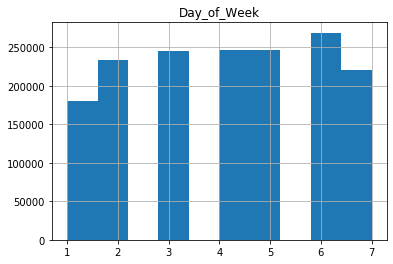

In [9]:
#Create histograms of day of week
display(Day_of_Week)
name = 'Day_of_Week'
data[name].hist()
plt.title(name)

,code,label
0,1,Roundabout
1,2,One way street
2,3,Dual carriageway
3,6,Single carriageway
4,7,Slip road
5,9,Unknown
6,12,One way street/Slip road
7,-1,Data missing or out of range


Text(0.5, 1.0, 'Road_Type')

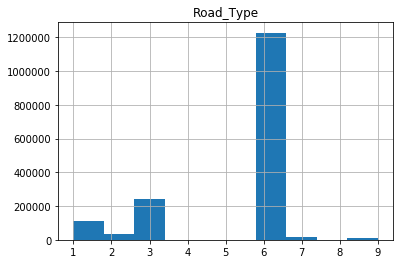

In [10]:
#Create histograms of roadtype
display(Road_Type)
name = 'Road_Type'
data[name].hist()
plt.title(name)

Text(0.5, 1.0, 'Speed_limit')

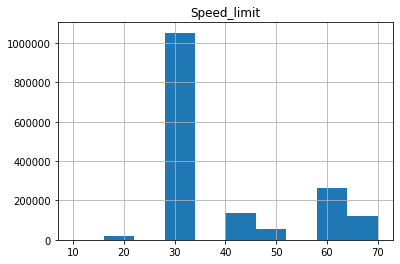

In [11]:
#Speed limit hist
name = 'Speed_limit'
data[name].hist()
plt.title(name)

,code,label
0,0,Not at junction or within 20 metres
1,1,Authorised person
2,2,Auto traffic signal
3,3,Stop sign
4,4,Give way or uncontrolled
5,-1,Data missing or out of range


Text(0.5, 1.0, 'Junction_Control')

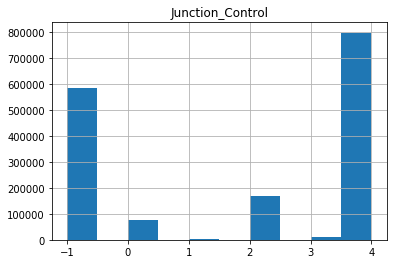

In [12]:
#Junction_Control hist
display(Junction_Control)
name = 'Junction_Control'
data[name].hist()
plt.title(name)

,code,label
0,1,Daylight
1,4,Darkness - lights lit
2,5,Darkness - lights unlit
3,6,Darkness - no lighting
4,7,Darkness - lighting unknown
5,-1,Data missing or out of range


Text(0.5, 1.0, 'Light_Conditions')

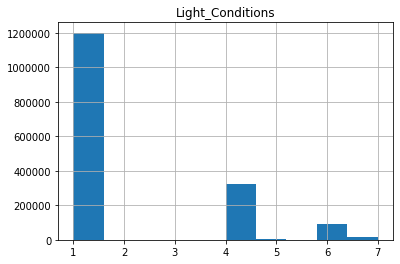

In [13]:
#Light_Conditions hist
display(Light_Conditions)
name = 'Light_Conditions'
data[name].hist()
plt.title(name)

,code,label
0,1,Fine no high winds
1,2,Raining no high winds
2,3,Snowing no high winds
3,4,Fine + high winds
4,5,Raining + high winds
5,6,Snowing + high winds
6,7,Fog or mist
7,8,Other
8,9,Unknown
9,-1,Data missing or out of range


Text(0.5, 1.0, 'Weather_Conditions')

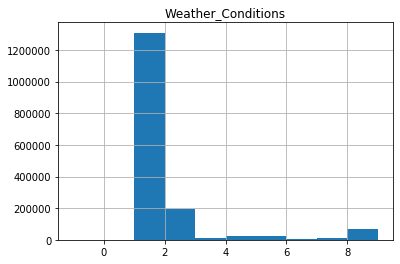

In [14]:
#Weather_Conditions hist
display(Weather_Conditions)
name = 'Weather_Conditions'
data[name].hist()
plt.title(name)

,code,label
0,1,Dry
1,2,Wet or damp
2,3,Snow
3,4,Frost or ice
4,5,Flood over 3cm. deep
5,6,Oil or diesel
6,7,Mud
7,-1,Data missing or out of range


Text(0.5, 1.0, 'Road_Surface_Conditions')

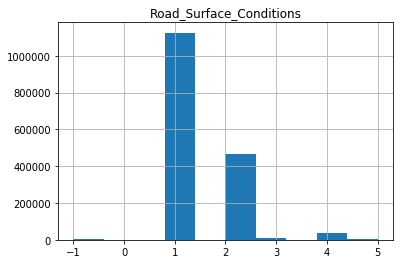

In [15]:
#Road_Surface_Conditions hist
display(Road_Surface_Conditions)
name = 'Road_Surface_Conditions'
data[name].hist()
plt.title(name)

In [16]:
#Data is very unbalanced
Sev_Group = data.groupby(['Accident_Severity']).count()
display(Sev_Group)

,Day_of_Week,Road_Type,Speed_limit,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
Accident_Severity,,,,,,,
1,21382,21382,21382,21382,21382,21382,21382
2,222042,222042,222042,222042,222042,222042,222042
3,1397173,1397173,1397173,1397173,1397173,1397173,1397173


In [17]:
#Make catagoricals binary sparse comulns
cols = ['Day_of_Week', 'Road_Type', 'Junction_Control', 
        'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions']

preproc_data = pd.get_dummies(data, columns=cols)

#Scale ordinals
preproc_data['Speed_limit'] = preproc_data['Speed_limit']/preproc_data['Speed_limit'].max()


In [18]:
#Balance data
#define x and y cols
x_cols = list(preproc_data.columns)
x_cols = x_cols[1:]

y_col = 'Accident_Severity'

bal_x, bal_y = BalanceInputData(df=preproc_data, x_cols=x_cols, y_col=y_col)

In [19]:
print(len(bal_x))
print(len(bal_y))

64146
64146


In [20]:
#Turn y into catagorical output
from tensorflow.keras.utils import to_categorical
bal_y = to_categorical(bal_y)

In [21]:
#Setting up the NN
from tensorflow.keras.layers import Dense, Activation

#initiate the model
model = keras.Sequential()

#Add layers
model.add(Dense(128, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(4, activation='softmax'))

In [22]:
#Create early stop callback
from tensorflow.keras.callbacks import EarlyStopping

stop_on_val_loss = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.0001, patience=5)

In [23]:
#Callback to store epoch data for graphing
from tensorflow.keras.callbacks import CSVLogger

file_name = 'CarCrash_logs.csv'
csv_logger = CSVLogger(filename=file_name, separator=',', append=False)

In [24]:
#Define loss function
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [25]:
#compile model
model.compile(optimizer='SGD',
              loss=loss_fn,
              metrics=['accuracy'])

In [26]:
#Train the model
model.fit(bal_x,bal_y, batch_size=256, epochs = 256,
         validation_split=0.25, callbacks=[csv_logger, stop_on_val_loss])

Train on 48109 samples, validate on 16037 samples
Epoch 1/256
48109/48109 [==============================] - 2s 32us/sample - loss: 1.3665 - accuracy: 0.3593 - val_loss: 1.3534 - val_accuracy: 0.3479
Epoch 2/256
48109/48109 [==============================] - 1s 26us/sample - loss: 1.3437 - accuracy: 0.3569 - val_loss: 1.3358 - val_accuracy: 0.3487
Epoch 3/256
48109/48109 [==============================] - 1s 24us/sample - loss: 1.3297 - accuracy: 0.3674 - val_loss: 1.3254 - val_accuracy: 0.3702
Epoch 4/256
48109/48109 [==============================] - 1s 27us/sample - loss: 1.3217 - accuracy: 0.3775 - val_loss: 1.3194 - val_accuracy: 0.3725
Epoch 5/256
48109/48109 [==============================] - 1s 22us/sample - loss: 1.3169 - accuracy: 0.3833 - val_loss: 1.3155 - val_accuracy: 0.3788
Epoch 6/256
48109/48109 [==============================] - 1s 27us/sample - loss: 1.3136 - accuracy: 0.3898 - val_loss: 1.3125 - val_accuracy: 0.3857
Epoch 7/256
48109/48109 [=========================

Epoch 55/256
48109/48109 [==============================] - 1s 25us/sample - loss: 1.2444 - accuracy: 0.4669 - val_loss: 1.2441 - val_accuracy: 0.4655
Epoch 56/256
48109/48109 [==============================] - 1s 26us/sample - loss: 1.2443 - accuracy: 0.4671 - val_loss: 1.2452 - val_accuracy: 0.4646
Epoch 57/256
48109/48109 [==============================] - 1s 27us/sample - loss: 1.2441 - accuracy: 0.4660 - val_loss: 1.2446 - val_accuracy: 0.4634
Epoch 58/256
48109/48109 [==============================] - 1s 27us/sample - loss: 1.2441 - accuracy: 0.4664 - val_loss: 1.2446 - val_accuracy: 0.4636
Epoch 59/256
48109/48109 [==============================] - 1s 27us/sample - loss: 1.2441 - accuracy: 0.4669 - val_loss: 1.2440 - val_accuracy: 0.4646
Epoch 60/256
48109/48109 [==============================] - 1s 26us/sample - loss: 1.2440 - accuracy: 0.4663 - val_loss: 1.2440 - val_accuracy: 0.4656
Epoch 61/256
48109/48109 [==============================] - 1s 26us/sample - loss: 1.2439 - ac

,accuracy,loss,val_accuracy,val_loss
0,0.359309,1.366452,0.347883,1.353424
1,0.356856,1.343717,0.348694,1.335761
2,0.367436,1.329733,0.370206,1.325359
3,0.377455,1.321737,0.372514,1.319355
4,0.383338,1.316921,0.378811,1.315451
...,...,...,...,...
62,0.466794,1.243854,0.465923,1.243812
63,0.466690,1.243712,0.465299,1.243795
64,0.467231,1.243717,0.463179,1.243990
65,0.467854,1.243579,0.464239,1.243884


Max validation accuracy: 0.46660846
Min validation loss: 1.243794614421152


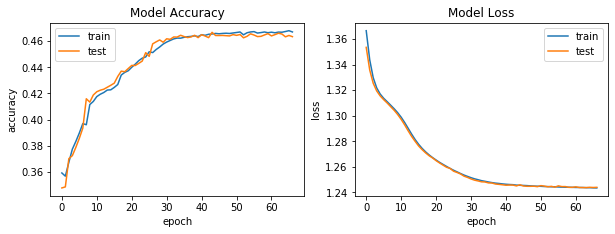

In [27]:
#Plot accuracy and loss
path = 'C:/Users/James Sloan/Documents/School/IE 4910 Python ML/Assignments/Project 3 Neural Networks'

PlotTrainingData(path=path, file_name=file_name)